# Explore here

In [54]:
# Your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.feature_selection import chi2, SelectKBest
import numpy as np

dataframe = pd.read_csv("../data/raw/bank-marketing-campaign-data.csv", delimiter=";")

dataframe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [55]:
if dataframe.isnull().sum().sum() > 0 or dataframe.isna().sum().sum() > 0:
    print("No missing values")
else:
    print("Missing values found")
    dataframe = dataframe.dropna(axis=1)

if dataframe.duplicated().sum() == 0:
    print("No duplicates")
else:
    print("Duplicates found")
    dataframe.drop_duplicates(inplace=True)
    dataframe.reset_index(drop=True, inplace=True)

dataframe["job_n"] = pd.factorize(dataframe["job"])[0]
dataframe["marital_n"] = pd.factorize(dataframe["marital"])[0]
dataframe["education_n"] = pd.factorize(dataframe["education"])[0]
dataframe["default_n"] = pd.factorize(dataframe["default"])[0]
dataframe["housing_n"] = pd.factorize(dataframe["housing"])[0]
dataframe["loan_n"] = pd.factorize(dataframe["loan"])[0]
dataframe["contact_n"] = pd.factorize(dataframe["contact"])[0]
dataframe["month_n"] = pd.factorize(dataframe["month"])[0]
dataframe["day_of_week_n"] = pd.factorize(dataframe["day_of_week"])[0]
dataframe["poutcome_n"] = pd.factorize(dataframe["poutcome"])[0]
dataframe["y_n"] = pd.factorize(dataframe['y'])[0]

dataframe = dataframe.select_dtypes(include=['int64', 'float64'])

dataframe.describe()

Missing values found
Duplicates found


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,...,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,...,0.510637,3.277370,0.208908,0.571959,0.199825,0.634714,2.249951,1.979600,0.169953,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,...,0.696794,2.185558,0.406713,0.541216,0.456055,0.481516,2.429157,1.411539,0.455811,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000,1.000000


In [57]:

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(dataframe)

dataframe = pd.DataFrame(scal_features, index = dataframe.index, columns = dataframe.columns)

X = dataframe.drop("y_n", axis=1)
y = dataframe["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

select_k_best = SelectKBest(chi2, k=7)
select_k_best.fit_transform(X_train, y_train)

selected_columns = X.columns[select_k_best.get_support()]
X_train_selected = pd.DataFrame(select_k_best.transform(X_train), columns=selected_columns)
X_test_selected = pd.DataFrame(select_k_best.transform(X_test), columns=selected_columns)

X_train_selected.head()

,duration,previous,emp.var.rate,euribor3m,nr.employed,month_n,poutcome_n
0,0.058154,0.0,1.000000,0.980503,1.000000,0.222222,0.0
1,0.036194,0.0,1.000000,0.958966,1.000000,0.111111,0.0
2,0.020943,0.0,1.000000,0.981410,1.000000,0.333333,0.0
3,0.027450,0.0,0.937500,0.958059,0.859735,0.000000,0.0
4,0.084994,0.0,0.333333,0.148946,0.512287,0.000000,0.0


In [58]:
# Detect outliers in numerical columns using the IQR method.

outlier_counts = {}

for col in X_train_selected:
    Q1 = X_train_selected[col].quantile(0.25)
    Q3 = X_train_selected[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = X_train_selected[(X_train_selected[col] < lower_bound) | (X_train_selected[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]
    
outliers = {col: count for col, count in outlier_counts.items() if count > 0}

print(outliers)


{'duration': 2356, 'previous': 4475, 'month_n': 2554, 'poutcome_n': 4475}


In [59]:
# Apply transformations to reduce outliers' impact on numerical columns

df_transformed = X_train_selected.copy()

for col in outliers.keys():
    #"log":
    X_train_selected[col] = np.log1p(X_train_selected[col])
    #"sqrt":
    #df_transformed[col] = np.sqrt(dataframe[col])
    #elif method == "boxcox":
    #df_transformed[col], _ = boxcox(dataframe[col] + 1)

df_transformed.describe()

,duration,previous,emp.var.rate,euribor3m,nr.employed,month_n,poutcome_n
count,32940.000000,32940.000000,32940.000000,32940.000000,32940.000000,32940.000000,32940.000000
mean,0.052252,0.024608,0.725708,0.677316,0.769223,0.250246,0.084608
std,0.052484,0.070590,0.327004,0.393145,0.273627,0.269945,0.227660
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020740,0.000000,0.333333,0.160961,0.512287,0.000000,0.000000
50%,0.036194,0.000000,0.937500,0.957379,0.859735,0.222222,0.000000
75%,0.064711,0.000000,1.000000,0.980957,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"ROC-AUC score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7265
         1.0       0.66      0.36      0.46       971

    accuracy                           0.90      8236
   macro avg       0.79      0.67      0.71      8236
weighted avg       0.89      0.90      0.89      8236

ROC-AUC score: 0.9220599023434592


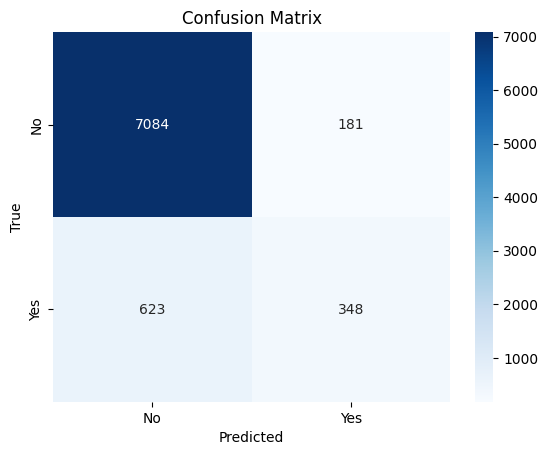

In [61]:
""" display as plot confusion matrix """
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [64]:
hyperparams = {
	"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
	"penalty": ["l1", "l2", "elasticnet", "none"],
	"solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "max_iter": [200, 250, 300, 500]
}

grid = GridSearchCV(model, hyperparams, scoring = "recall", cv = 10)
grid.fit(X_train, y_train)
print(f"Best hyperparamters: {grid.best_params_}")


KeyboardInterrupt: 

In [40]:
model = LogisticRegression(**grid.best_params_)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"ROC-AUC score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      7265
         1.0       0.65      0.39      0.49       971

    accuracy                           0.90      8236
   macro avg       0.79      0.68      0.72      8236
weighted avg       0.89      0.90      0.89      8236

ROC-AUC score: 0.9234390582218116


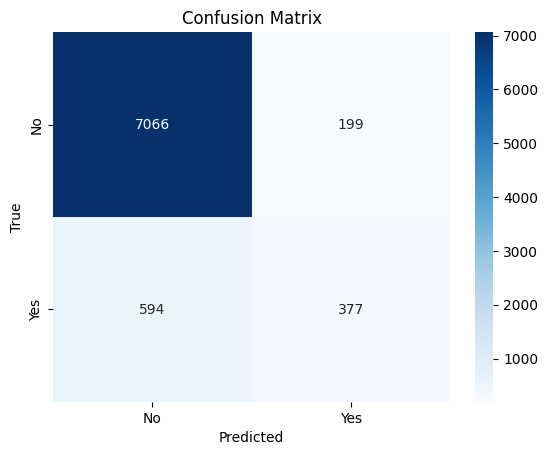

In [41]:
""" display as plot confusion matrix """
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()